In [1]:
# Include this line to make plots interactive
%matplotlib notebook

In [2]:
#Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [5]:
#Reading Mouse Drug Data File
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [6]:
#Reading data from the Cinical Trial sheet
clinical_trial = pd.read_csv(clinical_trial_data_to_load)
clinical_trial

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
#Merging the two data files into one dataset
mouse_clinical_data = pd.merge(clinical_trial, mouse_drug_data, how="left", on=['Mouse ID','Mouse ID'])

#Displaying the table for preview
mouse_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


# Tumor Response to Treatment

In [8]:
#Calculating the Mean Tumor VOlume  grouped by Drug and Timepoint
meanTumor = mouse_clinical_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

#Converting the series into a dataframe
tumorVolMean = pd.DataFrame(meanTumor).reset_index()

#Displaying the dataframe
tumorVolMean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [9]:
#Calculating the Standard Error of Tumor Volumes grouped by Drug and TImepoint
standardTumor = mouse_clinical_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

#Storing the data into a dataframe
standardErrTumor = pd.DataFrame(standardTumor).reset_index()

#Displaying the dataframe
standardErrTumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
#Re-Formatting the Mean Volume dataframe
#Got this attrivute from "https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77"
formatted_tumorMean = tumorVolMean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

#Displaying the formatted dataframe
formatted_tumorMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [11]:
#Re-Formatting the Standard Error Volume dataframe
formatted_standarderr = standardErrTumor.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

#Displaying the dataframe
formatted_standarderr

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


<IPython.core.display.Javascript object>


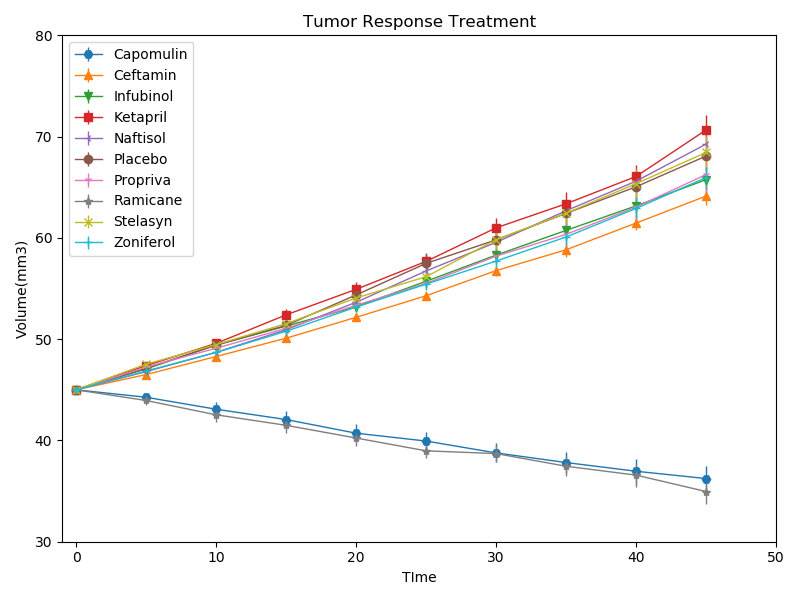

In [12]:
#Generating the plot
VolumeChart = formatted_tumorMean.plot(kind='line',yerr=formatted_standarderr, title= 'Tumor Response Treatment', figsize=(8,6), linewidth=1)
plt.show()

In [49]:
#Setting limits for the plot
VolumeChart.set_xlim(-1,50)
VolumeChart.set_ylim(30,80)

(30, 80)

In [50]:
#Defining marker list to generate it on the plot
markers = ['H', '^', 'v', 's', '3', 'o', '1', '*','x','+']
for i, line in enumerate(VolumeChart.get_lines()):
    line.set_marker(markers[i])

In [51]:
#Displaying the legend with the updated markers
plt.legend(loc="best")

In [52]:
#Setting Plot labels
VolumeChart.set_xlabel("TIme")
VolumeChart.set_ylabel("Volume(mm3)")

Text(29.125, 0.5, 'Volume(mm3)')

In [16]:
#Aligning the plot
plt.tight_layout()

In [53]:
fig = VolumeChart.get_figure()
fig.savefig('Images/Tumor Treatment Response Chart')

#  Metastatic Response to Treatment

In [18]:
#Calculating Mean Met Site Data grouped bu Drug and Timepoint
meanMetSite = mouse_clinical_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

#storing Data in a dataframe
meanMetSiteData = pd.DataFrame(meanMetSite)

#Displaying Data
meanMetSiteData.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [19]:
#Calculating Mean Met Site Data grouped bu Drug and Timepoint
standardErrMetSite = mouse_clinical_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

#storing Data in a dataframe
standardErrMetSiteData = pd.DataFrame(standardErrMetSite)

#Displaying Data
standardErrMetSiteData.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [20]:
#Re-Formatting the Mean Volume dataframe
meanMetSiteData = meanMetSiteData.reset_index()
formattedMeanMet = meanMetSiteData.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

#Displaying Data
formattedMeanMet

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [21]:
#Re-Formatting the Standard Error Volume dataframe
standardErrMetSiteData = standardErrMetSiteData.reset_index()
formattedErrMet = standardErrMetSiteData.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

#Displaying Data
formattedErrMet

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


<IPython.core.display.Javascript object>


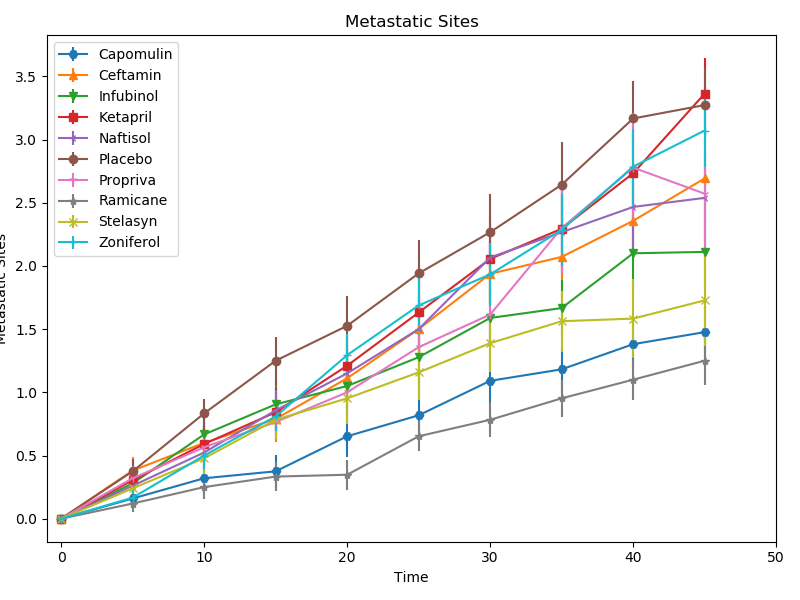

In [22]:
#Generating the plot
metaStaticPlot =formattedMeanMet.plot(kind='line', yerr=formattedErrMet, title= 'Metastatic Sites', figsize=(8,6))
plt.show()

In [54]:
#Setting plot labels
metaStaticPlot.set_xlabel('Time')
metaStaticPlot.set_ylabel('Metastatic Sites')
metaStaticPlot.set_xlim(-1, 50)

(-1, 50)

In [55]:
#Defining marker list to generate it on the plot
markers = ['H', '^', 'v', 's', '3', 'o', '1', '*','x','+']
for i, line in enumerate(metaStaticPlot.get_lines()):
    line.set_marker(markers[i])

In [56]:
#Displaying the legend with the updated markers
plt.legend(loc="best")

In [57]:
#Aligning the plot
plt.tight_layout()

In [58]:
fig = metaStaticPlot.get_figure()
fig.savefig('Images/Metastatic Sites Chart')

#  Survival Rates

In [27]:
#Calculating Count of Mice Grouped by Drug and Timepoint
mouse = mouse_clinical_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

#Converting to Dataframe
mouseCount = pd.DataFrame(mouse)

#Renaming the mouse count column
mouseCount.rename(columns = {'Mouse ID' : 'Mouse Count'}, inplace=True)

#Displaying Data
mouseCount.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [28]:
#Re-formatting the dataframe
mouseCount = mouseCount.reset_index()
formattedMouseCount = mouseCount.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

#Displaying Data
formattedMouseCount

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


<IPython.core.display.Javascript object>


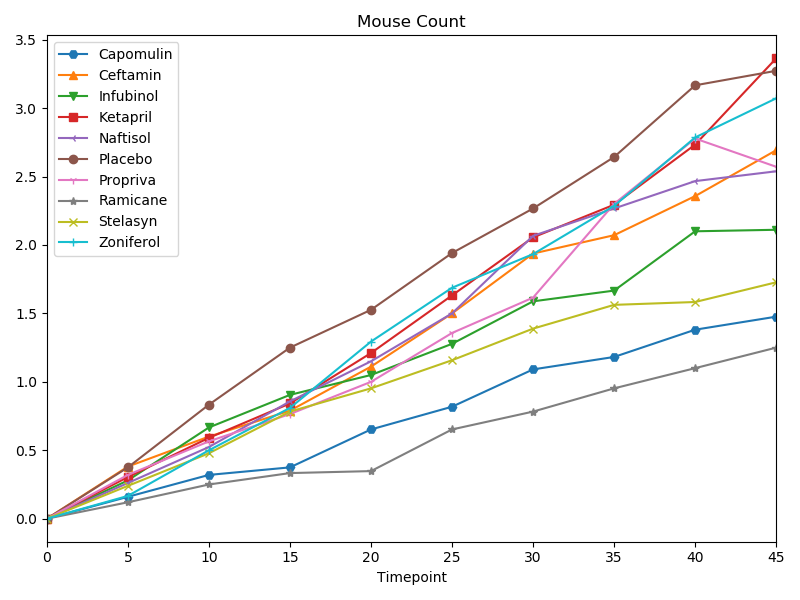

In [59]:
#Generating Plot
surRatesPlot = formattedMeanMet.plot(kind='line', title= 'Mouse Count', figsize=(8,6))

In [60]:
for i, line in enumerate(surRatesPlot.get_lines()):
    line.set_marker(markers[i])

In [61]:
plt.legend(loc='best')

In [62]:
plt.tight_layout()

In [63]:
fig = surRatesPlot.get_figure()
fig.savefig('Images/Mouse Count Chart')

In [37]:
plt.show()

# Summary Bar Graph

In [38]:
#Calculating the percent change for each drug
change = (formatted_tumorMean.iloc[9,:] - formatted_tumorMean.iloc[0, :])/formatted_tumorMean.iloc[0, :] * 100

summary_df = pd.DataFrame(change)
summary_df['positive'] = change.values > 0

summary_df.rename(columns={0: "Percent"}, inplace=True)

summary_df

,Percent,positive
Drug,,
Capomulin,-19.475303,False
Ceftamin,42.516492,True
Infubinol,46.123472,True
Ketapril,57.028795,True
Naftisol,53.923347,True
Placebo,51.297960,True
Propriva,47.241175,True
Ramicane,-22.320900,False
Stelasyn,52.085134,True


<IPython.core.display.Javascript object>


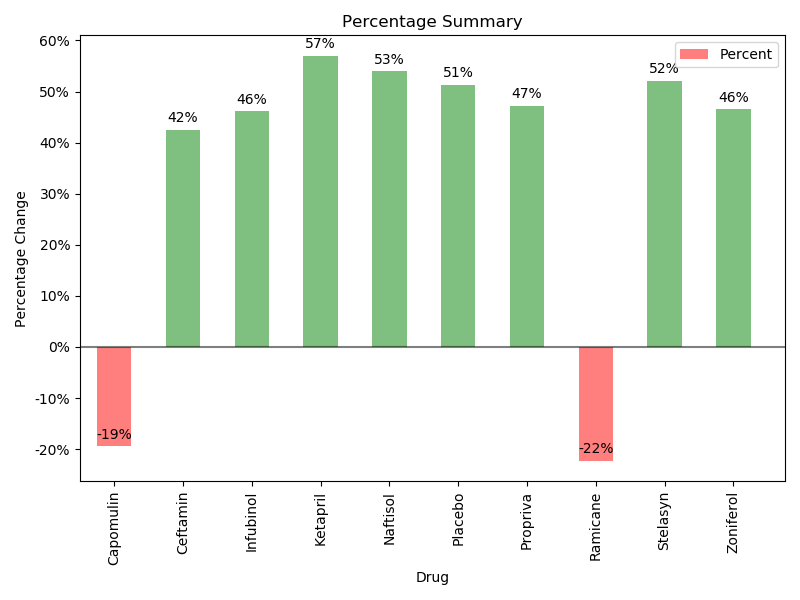

In [39]:
#GOt color conditioning code from https://stackoverflow.com/questions/22311139/matplotlib-bar-chart-choose-color-if-value-is-positive-vs-value-is-negative
fig, ax = plt.subplots()
summaryPlot = summary_df['Percent'].plot(kind='bar', alpha=0.5, align='center',color=summary_df.positive.map({True: 'g', False: 'r'}), ax=ax, figsize = (8,6), title = 'Percentage Summary')


In [40]:
summaryPlot.hlines(0,-1,10, alpha=0.5, color='black')

In [41]:
summaryPlot.set_xticklabels(summary_df.index, rotation='vertical')

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ceftamin'),
 Text(2, 0, 'Infubinol'),
 Text(3, 0, 'Ketapril'),
 Text(4, 0, 'Naftisol'),
 Text(5, 0, 'Placebo'),
 Text(6, 0, 'Propriva'),
 Text(7, 0, 'Ramicane'),
 Text(8, 0, 'Stelasyn'),
 Text(9, 0, 'Zoniferol')]

In [42]:
summaryPlot.set_xlim(-0.5, len(summary_df.index)-.25)

(-0.5, 9.75)

In [43]:
summaryPlot.set_ylabel('Percentage Change')

Text(55.472222222222214, 0.5, 'Percentage Change')

In [44]:
#Displaying values on the top of the bar graph, got this code from 
#http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/ 
(y_bottom, y_top) = ax.get_ylim()
y_height = y_top - y_bottom
for i in ax.patches:
    height = i.get_height()

    # Fraction of axis height taken up by this rectangle
    p_height = (height / y_height)

    # If we can fit the label above the column, do that;
    # otherwise, put it inside the column.
    if p_height > 0.95: # arbitrary; 95% looked good to me.
          label_position = height - (y_height * 0.05)
    else:
        label_position = height + (y_height * 0.01)

    ax.text(i.get_x() + i.get_width()/2., label_position,
            '%d' % int(height) + '%',
            ha='center', va='bottom')


In [45]:
#Adding percent sign to the values, got this code from 
#https://stackoverflow.com/questions/36116718/how-to-change-bar-chart-values-to-percentages-matplotlib
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)

In [46]:
plt.tight_layout()

In [47]:
fig = summaryPlot.get_figure()
fig.savefig('Images/Percentage Summary Chart')

In [48]:
plt.show()